In [3]:
from scipy.io import wavfile
import scipy.io
import matplotlib.pyplot as plt

import numpy as np

In [4]:
# wav to data
sample_rate, data = wavfile.read('Billie.wav')

In [5]:
data

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int16)

In [4]:
print(sample_rate)

44100


In [5]:
print(f"number of channels = {data.shape[1]}")

number of channels = 2


In [6]:
length = data.shape[0] / sample_rate
print(f"length = {length}s")

length = 407.0s


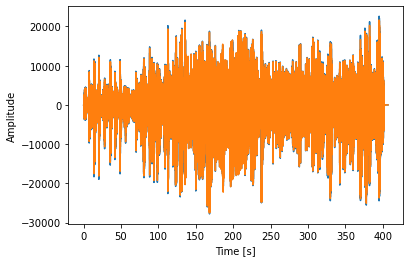

In [7]:


time = np.linspace(0., length, data.shape[0]) # create time for each data item 

plt.plot(time, data[:, 0], label="Left channel")

plt.plot(time, data[:, 1], label="Right channel")

#plt.legend()

plt.xlabel("Time [s]")

plt.ylabel("Amplitude")

plt.show()

In [7]:
print(type(data[0][0]))
print(data.shape[0]) # We have this number of data items in time

<class 'numpy.int16'>
17948700


In [8]:
# data to wav
import scipy.io.wavfile as wavf
fs = 44100
out_f = 'out.wav'
wavf.write(out_f, fs, data)

PSD OF BILLIE HOLLIDAY

In [9]:
import scipy.fft as fft

B = fft.rfft(data[:, 0]) # real fft as we only have real voltage values
print(B.size)

8974351


There will need to be a step here to convert according to the inputted hydrophone sensitivity

In [10]:
PSD_B = 10*np.log(np.abs(B)**2) # Power spectral density

When the input a is a time-domain signal and A = fft(a), np.abs(A) is its amplitude spectrum 
and np.abs(A)**2 is its power spectrum. The phase spectrum is obtained by np.angle(A).

https://stackoverflow.com/questions/15382076/plotting-power-spectrum-in-python

In [12]:
freqs = fft.rfftfreq(time.size, 1/sample_rate) # (window length, sample spacing)

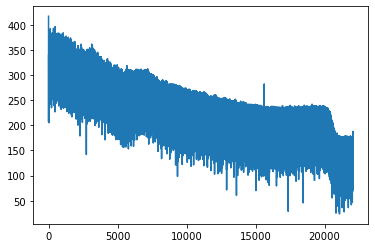

In [13]:
idx = np.argsort(freqs) 
plt.plot(freqs[idx], PSD_B[idx])

In [18]:
# Produce a sine wave

sample_rate = 44100
sampling_interval = 1/sample_rate

freq = 100
omega = 2*np.pi*freq
amplitude = np.iinfo(np.int16).max # output machine limit for type

t = np.arange(0, 4, sampling_interval)
y = amplitude*np.sin(omega*t)

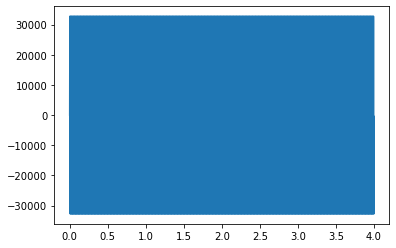

In [19]:
plt.plot(t, y)

In [117]:
print(type(y[0]))

<class 'numpy.float64'>


In [118]:
out_sine = 'out_sine_audio.wav'
wavf.write(out_sine, sampling_rate, y.astype(np.int16)) # output needs to be int16 for compatibility

PRODUCE A CHIRP

In [8]:
from scipy.signal import chirp, spectrogram
import numpy as np
import matplotlib.pyplot as plt

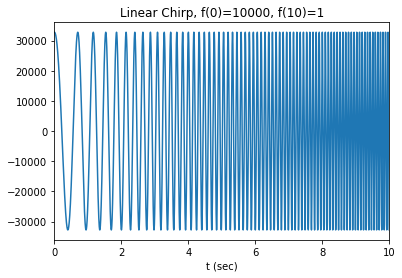

In [36]:
sampling_rate = 44.1e4
sampling_interval = 1/sample_rate

t = np.arange(0, 10, sampling_interval) # 4-second chirp
amplitude = np.iinfo(np.int16).max # output machine limit for type
w = amplitude*chirp(t, f0=1, f1=6, t1=4, method='linear')
#  f0 = initial freq, f1 = freq at t1

plt.plot(t, w)

plt.title("Linear Chirp, f(0)=10000, f(10)=1")
plt.xlim([0, 10])
plt.xlabel('t (sec)')

plt.show()

In [12]:
import scipy.io.wavfile as wavf

out_chirp = 'out_chirp_audio.wav'
wavf.write(out_chirp, sampling_rate, w.astype(np.int16)) # output needs to be int16 for compatibility

PSD OF CHIRP

In [13]:
import scipy.fft as fft

CHIRP_FFT = fft.rfft(w)
PSD_CHIRP = 10*np.log(np.abs(CHIRP_FFT)**2) # Power spectral density
freqs = fft.rfftfreq(t.size, 1/sample_rate) # (window length, sample spacing)

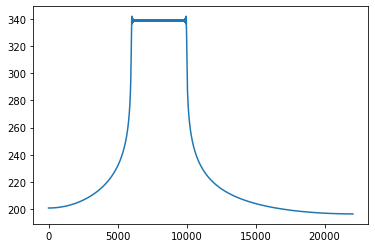

In [14]:
idx = np.argsort(freqs) 
plt.plot(freqs[idx], PSD_CHIRP[idx])